# `visualize_automaton` Demo

Demonstrates the `visualize_automaton` function from `transduction.vibes`,
which renders FSAs and FSTs with merged parallel edges and compact labels.

In [1]:
from transduction import FSA, EPSILON
from transduction.fst import FST
from transduction.vibes import visualize_automaton

---
## 1. FSA: Basic label compression

### 1.1 Range compression

Parallel edges on consecutive characters collapse into bracket expressions like `[a-z]`.

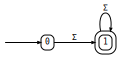

In [2]:
m = FSA()
m.add_start(0); m.add_stop(1)
for c in 'abcdefghij':
    m.add(0, c, 1)
    m.add(1, c, 1)
display(visualize_automaton(m))

### 1.2 Complement notation

When most of the alphabet is present, shows `\u03a3 \u2212 {excl}` instead of listing everything.

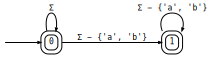

In [3]:
m = FSA()
m.add_start(0); m.add_stop(0)
alpha = set('abcdefghijklmnop')
for c in alpha:
    m.add(0, c, 0)
# State 1: missing just 'a' and 'b'
m.add_stop(1)
for c in alpha - {'a', 'b'}:
    m.add(0, c, 1)
    m.add(1, c, 1)
display(visualize_automaton(m))

### 1.3 Epsilon edges

Epsilon transitions are shown separately from symbol edges.

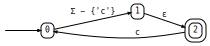

In [4]:
m = FSA()
m.add_start(0); m.add_stop(2)
m.add(0, 'a', 1)
m.add(0, 'b', 1)
m.add(1, EPSILON, 2)
m.add(2, 'c', 0)
display(visualize_automaton(m))

---
## 2. FST: Identity arcs (copy)

Copy arcs `a:a` display without a colon, just like FSA arcs.

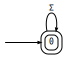

In [5]:
m = FST()
m.add_start(0); m.add_stop(0)
for c in 'abcde':
    m.add_arc(0, c, c, 0)
display(visualize_automaton(m))

## 3. FST: Deletion arcs (`a:ε`)

Multiple deletion arcs are grouped: `[a-c]:ε`.

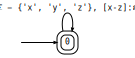

In [6]:
m = FST()
m.add_start(0); m.add_stop(0)
# Copy most symbols
for c in 'abcde':
    m.add_arc(0, c, c, 0)
# Delete x, y, z
for c in 'xyz':
    m.add_arc(0, c, EPSILON, 0)
display(visualize_automaton(m))

## 4. FST: Insertion arcs (`ε:b`)

Multiple insertion arcs are grouped: `ε:[x-z]`.

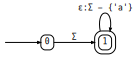

In [7]:
m = FST()
m.add_start(0); m.add_stop(1)
m.add_arc(0, 'a', 'a', 1)
# Insertions at state 1
for c in 'xyz':
    m.add_arc(1, EPSILON, c, 1)
display(visualize_automaton(m))

## 5. FST: Many-to-one relational arcs

Multiple inputs mapping to the same output: `[a-c]:X`.

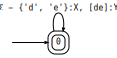

In [8]:
m = FST()
m.add_start(0); m.add_stop(0)
for c in 'abc':
    m.add_arc(0, c, 'X', 0)
for c in 'de':
    m.add_arc(0, c, 'Y', 0)
display(visualize_automaton(m))

## 6. FST: Cartesian product factoring

When every input maps to every output between the same pair of states,
the label factors as `inputs:outputs` (e.g. `[ab]:[xy]`).

In [9]:
m = FST()
m.add_start(0); m.add_stop(1)
# Full cartesian product: {a,b,c} x {x,y}
for a in 'abc':
    for b in 'xy':
        m.add_arc(0, a, b, 1)
display(visualize_automaton(m))

## 7. FST: Complement notation (`A`, `B`)

For FSTs, the input alphabet is called **A** and the output alphabet **B**.
When most of an alphabet appears on an edge, complement notation uses the
appropriate name: `A − {excl}` for inputs, `B − {excl}` for outputs.
(FSAs use `Σ` — see §1.2.)

In [ ]:
# Input complement: copy a,b; delete everything else → "A − {a, b}:ε"
m = FST()
m.add_start(0); m.add_stop(0)
alpha = set('abcdefghij')
for c in ['a', 'b']:
    m.add_arc(0, c, c, 0)
for c in sorted(alpha - {'a', 'b'}):
    m.add_arc(0, c, EPSILON, 0)
display(visualize_automaton(m))

# Output complement: insert most outputs → "ε:B − {a}"
m2 = FST()
m2.add_start(0); m2.add_stop(1)
m2.add_arc(0, 'x', 'x', 1)
out_alpha = set('abcdefghij')
for c in sorted(out_alpha - {'a'}):
    m2.add_arc(1, EPSILON, c, 1)
display(visualize_automaton(m2))

## 8. FST: Mixed identity + relational + epsilon

All categories on the same edge are shown together.

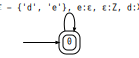

In [10]:
m = FST()
m.add_start(0); m.add_stop(0)
# Identity arcs
for c in 'abc':
    m.add_arc(0, c, c, 0)
# Relational arc
m.add_arc(0, 'd', 'X', 0)
# Deletion arc
m.add_arc(0, 'e', EPSILON, 0)
# Insertion arc
m.add_arc(0, EPSILON, 'Z', 0)
display(visualize_automaton(m))

## 9. FST: Irreducible relational arcs

When pairs don't form a cartesian product, each factor is listed separately.

In [12]:
m = FST()
m.add_start(0); m.add_stop(1)
m.add_arc(0, 'a', 'a', 1)
m.add_arc(0, 'b', 'y', 1)
m.add_arc(0, 'c', 'z', 1)
display(visualize_automaton(m))

## 10. Real example: `newspeak2` FST

A practical FST from the test suite.

8 states, A={'c', 'd', 'b', 'i', 'j', 's', 'x', 'y', 'n', 'a', 'e', 't', 'r', 'm', 'k', 'f', 'h', 'w', 'g', 'q', 'p', 'l', 'u', 'z', 'v', 'o'}, B={'c', 'd', 'b', 'i', 'j', 's', 'x', 'y', 'n', 'a', 'e', 't', 'r', 'm', 'k', 'f', 'h', 'w', 'g', 'q', 'p', 'l', 'u', 'z', 'v', 'o'}


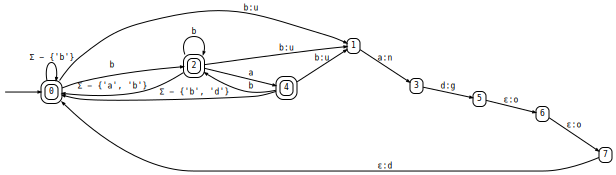

In [13]:
from transduction import examples

fst = examples.newspeak2()
print(f'{len(fst.states)} states, A={fst.A - {EPSILON}}, B={fst.B - {EPSILON}}')
display(visualize_automaton(fst))

---
## 11. Customization

### 11.1 `fmt_state`: custom node labels

In [ ]:
m = FSA()
m.add_start('start'); m.add_stop('end')
m.add('start', 'a', 'mid')
m.add('mid', 'b', 'end')

display(visualize_automaton(m, fmt_state=lambda q: f'[{q}]'))

### 11.2 `sty_node`: per-node styling

Same convention as `FSA.graphviz(sty_node=...)`: a callable returning a dict of
Graphviz node attributes.

In [ ]:
m = FSA()
m.add_start(0); m.add_stop(2)
for c in 'abc':
    m.add(0, c, 1)
    m.add(1, c, 2)
    m.add(2, c, 0)

colors = {0: '#90EE90', 1: '#f2d66f', 2: '#f26fec'}

display(visualize_automaton(
    m,
    sty_node=lambda q: {'style': 'filled,rounded', 'fillcolor': colors.get(q, 'white')},
))

### 11.3 `node_attrs` / `edge_attrs`: global graph styling

In [ ]:
m = FSA()
m.add_start(0); m.add_stop(1)
for c in 'abcde':
    m.add(0, c, 1)
    m.add(1, c, 0)

display(visualize_automaton(
    m,
    rankdir='TB',
    node_attrs={'fontsize': '12', 'shape': 'circle'},
    edge_attrs={'fontsize': '10', 'color': 'navy'},
))

### 11.4 Combined: styled FST

All options together on an FST.

In [ ]:
fst = examples.delete_b()

display(visualize_automaton(
    fst,
    fmt_state=lambda q: f'q{q}',
    sty_node=lambda q: {'style': 'filled,rounded', 'fillcolor': '#d4edda'},
    edge_attrs={'color': '#444444'},
))